<a href="https://colab.research.google.com/github/ArseniyZu/CreditPredict/blob/main/Main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

### Описание датасета
Этот набор данных содержит информацию о платежах по умолчанию, демографических факторах, кредитных данных, истории платежей и выписках по счетам клиентов по кредитным картам на Тайване с июля 2005 года по сентябрь 2005 года. Качественные признаки были уже преобразованы в количественные.

In [ ]:
df = pd.read_csv('defaultcredit.csv')
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,Pay1,Pay2,Pay3,Bill_amt1,Bill_amt2,Bill_amt3,Pay_amt1,Pay_amt2,Pay_amt3,default.payment.next.month
0,12,260000.0,Female,1,Single,51,-1,-1,2,8517.0,22287.0,13668.0,22301.0,0.0,3640.0,0
1,13,630000.0,Female,2,Single,41,-1,-1,-1,6500.0,6500.0,2870.0,6500.0,2870.0,0.0,0
2,17,20000.0,Male,1,Single,24,2,2,2,18338.0,17905.0,19104.0,0.0,1650.0,0.0,1
3,18,320000.0,Male,1,Married,49,-1,-1,-1,70074.0,5856.0,195599.0,20000.0,195599.0,50000.0,0
4,22,120000.0,Female,2,Married,39,-1,-1,-1,0.0,632.0,316.0,632.0,316.0,0.0,1


Вывод первых 5-и полей для понимания структуры данных

In [ ]:
df.shape

(5338, 16)

Датасет имеет 16 столбцов и 25312 наблюдения 

In [ ]:
df.dtypes

ID                              int64
LIMIT_BAL                     float64
SEX                            object
EDUCATION                       int64
MARRIAGE                       object
AGE                             int64
Pay1                            int64
Pay2                            int64
Pay3                            int64
Bill_amt1                     float64
Bill_amt2                     float64
Bill_amt3                     float64
Pay_amt1                      float64
Pay_amt2                      float64
Pay_amt3                      float64
default.payment.next.month      int64
dtype: object

Тип данных в каждом из столбцов, мы видим только количественные признаки

In [ ]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'Pay1',
       'Pay2', 'Pay3', 'Bill_amt1', 'Bill_amt2', 'Bill_amt3', 'Pay_amt1',
       'Pay_amt2', 'Pay_amt3', 'default.payment.next.month'],
      dtype='object')

### Физическое описание датасета   

#### Экзогенные переменные:    
ID : ID каждого клиента   
LIMIT_BAL : сумма предоставленного кредита в тайваньских долларах (включает индивидуальный и семейный / дополнительный кредит   
SEX : Male/Female   
EDUCATION : (1 = аспирантура, 2 = университет, 3 = средняя школа, 4 = другие, 5 = неизвестно, 6 = неизвестно)   
MARRIAGE : Married, Single, Other  
AGE : Возраст в годах   
Pay3 : Статус погашения в сентябре 2005 г. (-1 = надлежащая оплата, 1 = задержка платежа на один месяц, 2 = задержка платежа на два месяца,… 8 = задержка платежа на восемь месяцев, 9 = задержка платежа на девять месяцев и более)   
Pay2 : Статус погашения в августе 2005 г. (шкала такая же, как указано выше)   
Pay1 : Статус погашения в июле 2005 г. (шкала такая же, как указано выше)   
Bill_amt3 : Сумма выписки по счету за сентябрь 2005 г. (NT-доллар)   
Bill_amt2 : Сумма выписки по счету в августе 2005 г. (NT-доллар)   
Bill_amt1 : Сумма выписки по счету в июле 2005 г. (NT-доллар)    
Pay_amt3 : Сумма предыдущего платежа в сентябре 2005 г. (NT-доллар)   
Pay_amt2 : Сумма предыдущего платежа в августе 2005 г. (NT-доллар)   
Pay_amt1 : Сумма предыдущего платежа в июле 2005 г. (NT-доллар)  
#### Эндогенная переменная:    
default.payment.next.month : платеж по умолчанию (1 = да, 0 = нет)

Удалим ненужные для модели данные (ID)

In [ ]:
df.drop(columns=["ID"], inplace=True)

Проверим на наличие пропусков в данных

In [ ]:
df.isna().sum()

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
Pay1                          0
Pay2                          0
Pay3                          0
Bill_amt1                     0
Bill_amt2                     0
Bill_amt3                     0
Pay_amt1                      0
Pay_amt2                      0
Pay_amt3                      0
default.payment.next.month    0
dtype: int64

Выведем количество уникальных значений для каждого столбца

In [ ]:
df.nunique()

LIMIT_BAL                       64
SEX                              2
EDUCATION                        7
MARRIAGE                         4
AGE                             52
Pay1                             9
Pay2                             8
Pay3                             8
Bill_amt1                     3993
Bill_amt2                     3976
Bill_amt3                     3973
Pay_amt1                      2410
Pay_amt2                      2353
Pay_amt3                      2219
default.payment.next.month       2
dtype: int64

In [ ]:
df.EDUCATION.unique()

array([1, 2, 3, 6, 4, 0, 5], dtype=int64)

In [ ]:
df.shape

(5338, 15)

In [ ]:
df.drop(df[df.EDUCATION == 0].index, inplace = True)
df.shape

(5334, 15)

In [ ]:
df.EDUCATION.unique()

array([1, 2, 3, 6, 4, 5], dtype=int64)

In [ ]:
df.MARRIAGE.unique()

array(['Single', 'Married', 'Other', '0'], dtype=object)

In [ ]:
df.drop(df[df.MARRIAGE == "0"].index, inplace = True)

In [ ]:
df.MARRIAGE.unique()

array(['Single', 'Married', 'Other'], dtype=object)

In [ ]:
df.shape

(5320, 15)

### Преобразуем качественные данные в количественные
Используем метод LabelEncoder

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df.SEX)
df.SEX = le.transform(df.SEX)
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,Pay1,Pay2,Pay3,Bill_amt1,Bill_amt2,Bill_amt3,Pay_amt1,Pay_amt2,Pay_amt3,default.payment.next.month
0,260000.0,0,1,Single,51,-1,-1,2,8517.0,22287.0,13668.0,22301.0,0.0,3640.0,0
1,630000.0,0,2,Single,41,-1,-1,-1,6500.0,6500.0,2870.0,6500.0,2870.0,0.0,0
2,20000.0,1,1,Single,24,2,2,2,18338.0,17905.0,19104.0,0.0,1650.0,0.0,1
3,320000.0,1,1,Married,49,-1,-1,-1,70074.0,5856.0,195599.0,20000.0,195599.0,50000.0,0
4,120000.0,0,2,Married,39,-1,-1,-1,0.0,632.0,316.0,632.0,316.0,0.0,1


Теперь 0 - девушка, 1 - мужчина

In [ ]:
le2 = preprocessing.LabelEncoder()
le2.fit(df.MARRIAGE)
print(le2.transform(df.MARRIAGE))
df.MARRIAGE = le2.transform(df.MARRIAGE)
df.head()

[2 2 2 ... 2 0 2]


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,Pay1,Pay2,Pay3,Bill_amt1,Bill_amt2,Bill_amt3,Pay_amt1,Pay_amt2,Pay_amt3,default.payment.next.month
0,260000.0,0,1,2,51,-1,-1,2,8517.0,22287.0,13668.0,22301.0,0.0,3640.0,0
1,630000.0,0,2,2,41,-1,-1,-1,6500.0,6500.0,2870.0,6500.0,2870.0,0.0,0
2,20000.0,1,1,2,24,2,2,2,18338.0,17905.0,19104.0,0.0,1650.0,0.0,1
3,320000.0,1,1,0,49,-1,-1,-1,70074.0,5856.0,195599.0,20000.0,195599.0,50000.0,0
4,120000.0,0,2,0,39,-1,-1,-1,0.0,632.0,316.0,632.0,316.0,0.0,1


Теперь 0 - женат/замужем, 2 - одинок, 1 - другое

### Количественные характеристики данных

In [ ]:
df.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,Pay1,Pay2,Pay3,Bill_amt1,Bill_amt2,Bill_amt3,Pay_amt1,Pay_amt2,Pay_amt3,default.payment.next.month
count,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000
mean,169996.240602,0.397744,1.768985,0.980451,36.244173,0.239286,0.209398,0.221429,22099.053759,22023.530827,22517.390602,4792.756203,5120.728759,4768.647180,0.326504
std,126243.690674,0.489478,0.756383,0.995380,9.169928,1.735379,1.721475,1.694642,43197.351426,42484.812261,43833.864567,12087.677791,15775.508516,15666.402091,0.468978
min,10000.000000,0.000000,1.000000,0.000000,21.000000,-1.000000,-1.000000,-1.000000,-3903.000000,-15306.000000,-339603.000000,0.000000,0.000000,0.000000,0.000000
25%,60000.000000,0.000000,1.000000,0.000000,29.000000,-1.000000,-1.000000,-1.000000,889.750000,884.250000,801.500000,328.500000,2.000000,0.000000,0.000000
50%,150000.000000,0.000000,2.000000,0.000000,35.000000,-1.000000,-1.000000,-1.000000,4467.500000,4272.000000,4477.000000,1500.000000,1257.000000,1040.000000,0.000000
75%,240000.000000,1.000000,2.000000,2.000000,42.000000,2.000000,2.000000,2.000000,22916.250000,23520.250000,24527.250000,4296.250000,4167.500000,3686.750000,1.000000
max,800000.000000,1.000000,6.000000,2.000000,75.000000,8.000000,8.000000,8.000000,486776.000000,503914.000000,527711.000000,250144.000000,303512.000000,345293.000000,1.000000


### Корреляция, матрица корреляций

In [ ]:
df.corr()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,Pay1,Pay2,Pay3,Bill_amt1,Bill_amt2,Bill_amt3,Pay_amt1,Pay_amt2,Pay_amt3,default.payment.next.month
LIMIT_BAL,1.000000,0.010642,-0.236333,-0.131825,0.198323,-0.411370,-0.424183,-0.413851,0.036890,0.021979,0.034711,0.259770,0.233104,0.222920,-0.261860
SEX,0.010642,1.000000,-0.023954,0.010174,0.087388,0.087353,0.093021,0.086005,0.052517,0.050762,0.052258,-0.005103,0.003320,-0.000257,0.059065
EDUCATION,-0.236333,-0.023954,1.000000,-0.168062,0.162827,0.145533,0.147181,0.132466,0.010812,0.013294,0.006881,-0.060313,-0.056446,-0.063816,0.064805
MARRIAGE,-0.131825,0.010174,-0.168062,1.000000,-0.494477,0.050271,0.053409,0.051942,-0.007208,-0.009308,-0.005046,-0.028312,-0.002652,0.006984,-0.003642
AGE,0.198323,0.087388,0.162827,-0.494477,1.000000,-0.069136,-0.064611,-0.058987,0.009286,0.006619,0.012289,0.053369,0.062028,0.022568,0.008738
Pay1,-0.411370,0.087353,0.145533,0.050271,-0.069136,1.000000,0.920226,0.885168,0.405284,0.420700,0.401172,-0.141373,-0.130543,-0.111617,0.444308
Pay2,-0.424183,0.093021,0.147181,0.053409,-0.064611,0.920226,1.000000,0.923781,0.411986,0.422611,0.402254,-0.165855,-0.136958,-0.114623,0.450904
Pay3,-0.413851,0.086005,0.132466,0.051942,-0.058987,0.885168,0.923781,1.000000,0.407067,0.426123,0.400439,-0.136221,-0.155288,-0.112512,0.443165
Bill_amt1,0.036890,0.052517,0.010812,-0.007208,0.009286,0.405284,0.411986,0.407067,1.000000,0.937731,0.904676,0.118624,0.094135,0.108484,0.213260
Bill_amt2,0.021979,0.050762,0.013294,-0.009308,0.006619,0.420700,0.422611,0.426123,0.937731,1.000000,0.928205,0.255617,0.069803,0.096757,0.225632


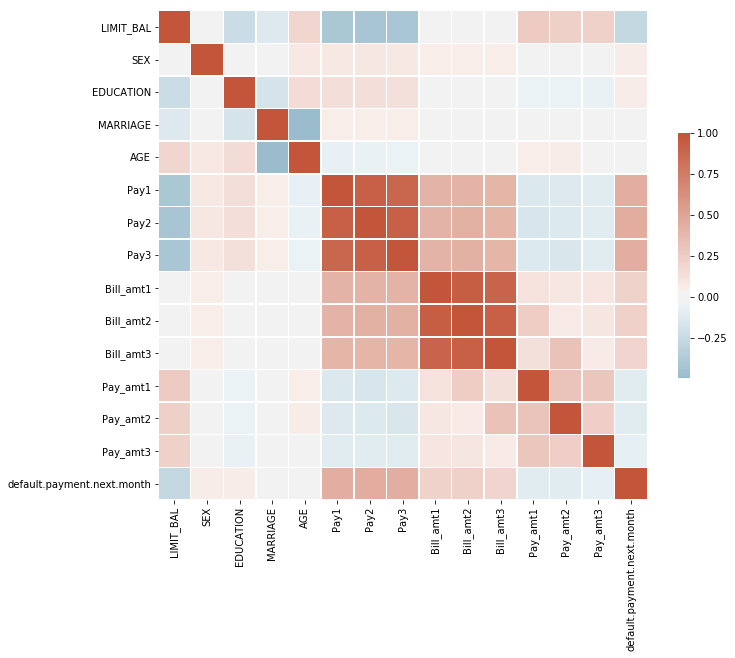

In [ ]:
f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(df.corr(), cmap=cmap, vmax=1, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [ ]:
for i in df.corr().columns:
    for j in range(len(df.corr().columns)):
        if abs(abs(df.corr().iloc[j][i])) > 0.9 and df.corr().iloc[j][i] != 1:
            print(df.corr().iloc[j][i], "- корреляция", df.corr().columns[j], i, "- сильно зависимые данные")

0.920226169152885 - корреляция Pay2 Pay1 - сильно зависимые данные
0.920226169152885 - корреляция Pay1 Pay2 - сильно зависимые данные
0.9237805040971502 - корреляция Pay3 Pay2 - сильно зависимые данные
0.9237805040971502 - корреляция Pay2 Pay3 - сильно зависимые данные
0.9377309710392575 - корреляция Bill_amt2 Bill_amt1 - сильно зависимые данные
0.9046764920204556 - корреляция Bill_amt3 Bill_amt1 - сильно зависимые данные
0.9377309710392575 - корреляция Bill_amt1 Bill_amt2 - сильно зависимые данные
0.9282050130861003 - корреляция Bill_amt3 Bill_amt2 - сильно зависимые данные
0.9046764920204556 - корреляция Bill_amt1 Bill_amt3 - сильно зависимые данные
0.9282050130861003 - корреляция Bill_amt2 Bill_amt3 - сильно зависимые данные


Исходя из этих данных мы можем принять решение об удалении одного поля (Bill_amt2, Bill_amt3, Pay2) и оставить только один признак Bill_amt1, поскольку данные сильно кореллируют между собой и для отсутствия ошибки переобучения модели их нужно убрать из нашего датасета.

In [ ]:
df.drop(columns=["Bill_amt2", "Bill_amt3", "Pay2"], inplace=True)
df.shape

(5320, 12)

In [ ]:
df.corr()["default.payment.next.month"]

LIMIT_BAL                    -0.261860
SEX                           0.059065
EDUCATION                     0.064805
MARRIAGE                     -0.003642
AGE                           0.008738
Pay1                          0.444308
Pay3                          0.443165
Bill_amt1                     0.213260
Pay_amt1                     -0.113446
Pay_amt2                     -0.109601
Pay_amt3                     -0.074950
default.payment.next.month    1.000000
Name: default.payment.next.month, dtype: float64

### Построение распределений признаков, выявление аномалий и их устранение

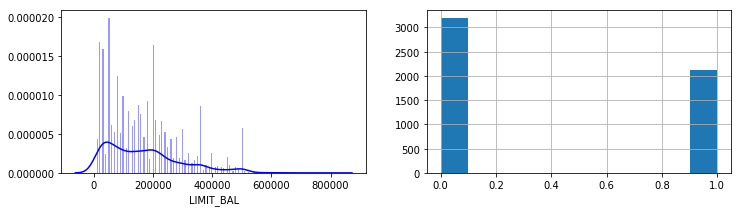

In [ ]:
plt.figure(figsize=(12, 3))
# Вывод графиков
plt.subplot(1, 2, 1)
sns.distplot(df.LIMIT_BAL, kde=True,bins=200, color="blue")
plt.subplot(1, 2, 2)
df.SEX.hist()

На графике признака LIMIT_BAL мы видим, что основной размер кредита в выборке не выходит за 600 000 тайваньский долларов. Значения после отметки в 600 000 являются нечастыми выбросами.    

Удалим аномальные наблюдения из нашей выборки

In [ ]:
df.drop(df[df.LIMIT_BAL > 600000].index, inplace=True)
df.shape

(5313, 12)

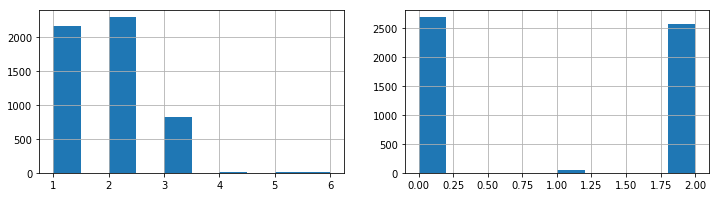

In [ ]:
plt.figure(figsize=(12, 3))
plt.subplot(1, 2, 1)
df.EDUCATION.hist()
plt.subplot(1, 2, 2)
df.MARRIAGE.hist()

Поскольку 5-6 принимает смысл «неизвестно», такое могло случиться при ошибке ввода данных, поэтому стоит удалить эти значения. 1 в столбце брачный статус означает другое, что странно, тоже удаляем.

In [ ]:
df.drop(df[df.EDUCATION > 4].index, inplace = True)
df.drop(df[df.MARRIAGE == 1].index, inplace = True)
df.shape

(5241, 12)

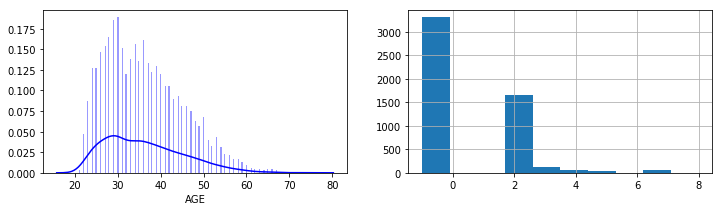

In [ ]:
plt.figure(figsize=(12, 3))
plt.subplot(1, 2, 1)
sns.distplot(df.AGE, kde=True,bins=200, color="blue")
plt.subplot(1, 2, 2)
df.Pay1.hist()

На графике распределения признака AGE мы наблюдаем основное значение в пределах 70 лет.   
На графиках Pay1-3 сильных отклонений нет, значения реальны

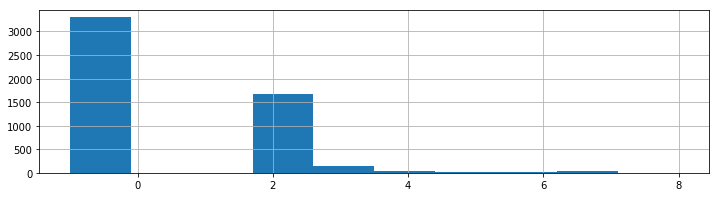

In [ ]:
plt.figure(figsize=(12, 3))
df.Pay3.hist()

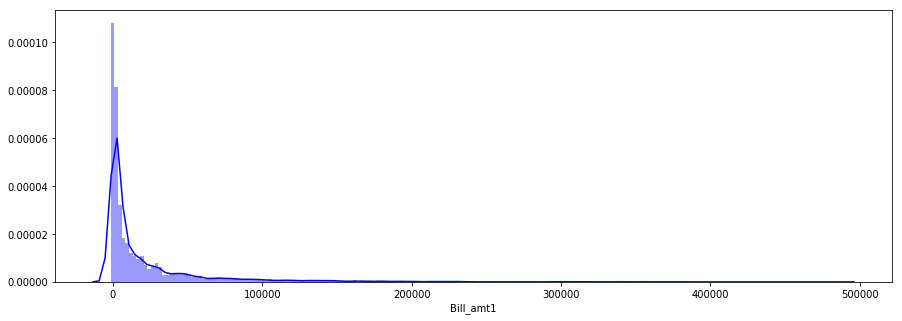

In [ ]:
plt.figure(figsize=(15, 5))
sns.distplot(df.Bill_amt1, kde=True,bins=200, color="blue")

Видно, что основная часть значений находится в диапозоне до 250 000, остальные значения являются нечастыми появлениями.

In [ ]:
df.drop(df[df.Bill_amt1 > 250000].index, inplace=True)
df.shape

(5211, 12)

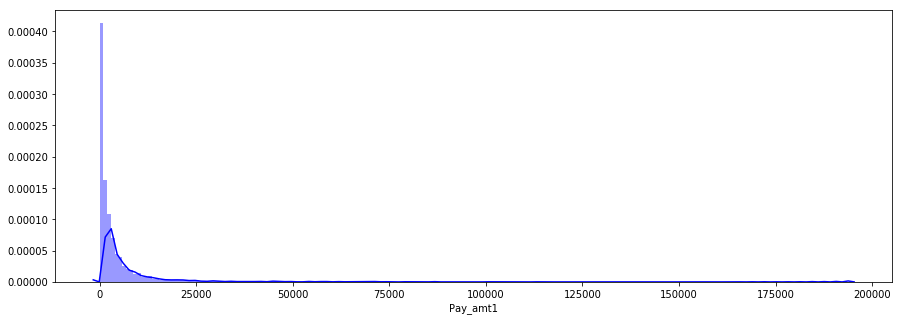

In [ ]:
plt.figure(figsize=(15, 5))
sns.distplot(df.Pay_amt1, kde=True,bins=200, color="blue")

Основая часть приходится на значения до 50 000

In [ ]:
df.drop(df[df.Pay_amt1 > 50000].index, inplace=True)
df.shape

(5141, 12)

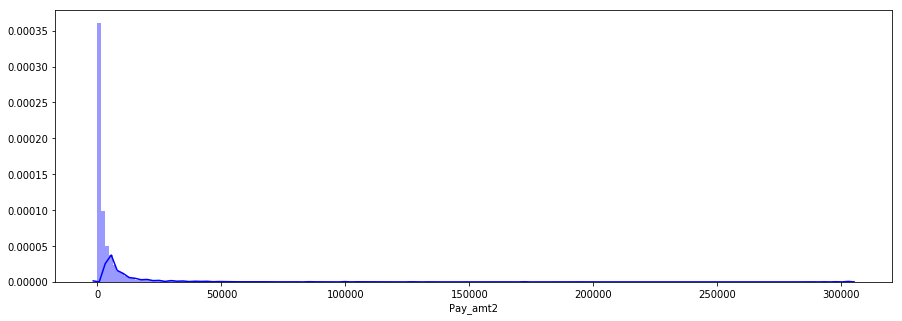

In [ ]:
plt.figure(figsize=(15, 5))
sns.distplot(df.Pay_amt2, kde=True,bins=200, color="blue")

Основная часть до 50000.

In [ ]:
df.drop(df[df.Pay_amt2 > 50000].index, inplace=True)
df.shape

(5086, 12)

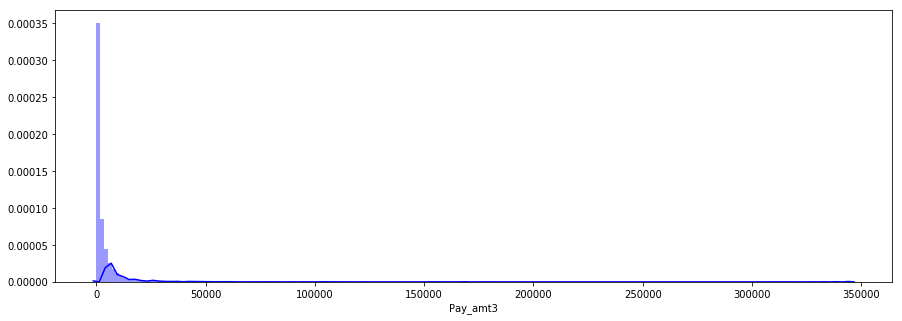

In [ ]:
plt.figure(figsize=(15, 5))
sns.distplot(df.Pay_amt3, kde=True,bins=200, color="blue")

Основная масса значений сосредоточнеа до 50000

In [ ]:
df.drop(df[df.Pay_amt3 > 50000].index, inplace=True)
df.shape

(5035, 12)

### Расбалансировка целевой переменной

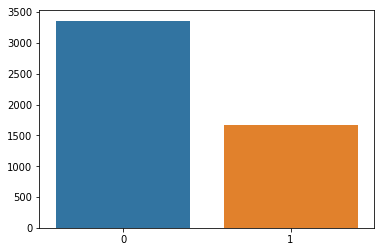

In [ ]:
temp = df['default.payment.next.month'].value_counts()
sns.barplot(data=df, x=temp.index, y=temp.values)

### Нормализация данных    
Поскольку признаки имеют очень заметный дисбаланс в значениях, для улучшения модели мы должны нормализовать данные.

In [ ]:
X = df.drop(columns=['default.payment.next.month'])
Y = df['default.payment.next.month']

Разделим выборку на экзогенные и эндогенные переменные

In [ ]:
X.describe().loc['mean']

LIMIT_BAL    164154.915591
SEX               0.398610
EDUCATION         1.759484
MARRIAGE          0.980338
AGE              36.119364
Pay1              0.261172
Pay3              0.248262
Bill_amt1     20116.188083
Pay_amt1       3555.347964
Pay_amt2       3480.403575
Pay_amt3       3045.262363
Name: mean, dtype: float64

По значению "mean" таблицы сверху можно понять, что некоторые признаки имеют сильный дисбаланс значений. Это может привести к ухудшению модели и осложенинию ее обучения. Для этого нам стоит нормализовать наши признаки. Для нормализации я буду использовать метод минимакс, которое происходит по формуле:   
# <center> $ \frac{X - X_{min}}{X_{max} - X_{min}} $ <center/>

In [ ]:
for i in X:
    X[i] = (X[i] - X[i].min()) / (X[i].max() - X[i].min())

In [ ]:
X.describe().loc["mean"]

LIMIT_BAL    0.261280
SEX          0.398610
EDUCATION    0.253161
MARRIAGE     0.490169
AGE          0.279988
Pay1         0.140130
Pay3         0.138696
Bill_amt1    0.096495
Pay_amt1     0.071107
Pay_amt2     0.069608
Pay_amt3     0.060905
Name: mean, dtype: float64

Наши признаки нормализованы.

In [ ]:
X.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,Pay1,Pay3,Bill_amt1,Pay_amt1,Pay_amt2,Pay_amt3
0,0.423729,0.0,0.000000,1.0,0.555556,0.000000,0.333333,0.049896,0.44602,0.00000,0.0728
2,0.016949,1.0,0.000000,1.0,0.055556,0.333333,0.333333,0.089351,0.00000,0.03300,0.0000
4,0.186441,0.0,0.333333,0.0,0.333333,0.000000,0.000000,0.015680,0.01264,0.00632,0.0000
5,0.101695,0.0,0.333333,1.0,0.092593,0.333333,0.333333,0.192470,0.07202,0.00000,0.0364
6,0.084746,1.0,0.000000,1.0,0.111111,0.000000,0.000000,0.015451,0.01000,0.00000,0.0200


### Разбиение выборки на обучающую и тестовую

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=True)

### Обучение модели, метрики качества
#### Модель метрического классификитора на основе логистической регрессии.

Построим модель логистической регрессии

In [ ]:
from sklearn.linear_model import LogisticRegression
cls = LogisticRegression()

Обучим классификатор

In [ ]:
cls.fit(x_train, y_train)

LogisticRegression()

Предскажем значения на тестовой выборке

In [ ]:
y_pred = cls.predict(x_test)

Оценим эффективность модели

In [ ]:
from sklearn import metrics
metrics.confusion_matrix(y_test, y_pred)

array([[278,  49],
       [ 69, 108]], dtype=int64)

Text(0.5,15,'Предсказанные значения')

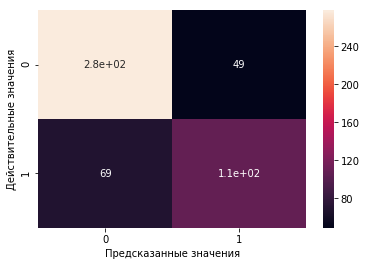

In [ ]:
%matplotlib inline
class_names = [0, 1]
fig, ax = plt.subplots()
ticks = np.arange(len(class_names))
plt.xticks(ticks, class_names)
plt.yticks(ticks, class_names)
sns.heatmap(pd.DataFrame(
metrics.confusion_matrix(y_test, y_pred)), annot=True)
plt.ylabel('Действительные значения')
plt.xlabel('Предсказанные значения')

In [ ]:
metrics.accuracy_score(y_test, y_pred)

0.7658730158730159

In [ ]:
metrics.precision_score(y_test, y_pred)

0.6878980891719745

In [ ]:
metrics.recall_score(y_test, y_pred)

0.6101694915254238

In [ ]:
metrics.f1_score(y_test, y_pred)

0.6467065868263473

In [ ]:
from sklearn.metrics import classification_report
print(metrics.confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[278  49]
 [ 69 108]]
              precision    recall  f1-score   support

           0       0.80      0.85      0.82       327
           1       0.69      0.61      0.65       177

    accuracy                           0.77       504
   macro avg       0.74      0.73      0.74       504
weighted avg       0.76      0.77      0.76       504



Метрики показали плохой результат, только метрика accuracy выше 0.7, но она не является лучшей метрикой для оценки модели. По важным метриками recall и ф-мера модель показала неудовлетворительный результат.

In [ ]:
metrics.roc_auc_score(y_test, y_pred)

0.7301611983621002

#### Построение классификатора методом k-ближайших соседей

Для начала используем K со значением 5

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(x_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred = classifier.predict(x_test)

In [ ]:
metrics.confusion_matrix(y_test, y_pred)

array([[267,  60],
       [ 89,  88]], dtype=int64)

Text(0.5,15,'Предсказанные значения')

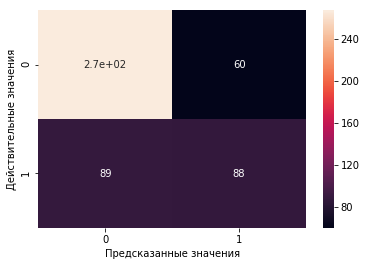

In [ ]:
%matplotlib inline
class_names = [0, 1]
fig, ax = plt.subplots()
ticks = np.arange(len(class_names))
plt.xticks(ticks, class_names)
plt.yticks(ticks, class_names)
sns.heatmap(pd.DataFrame(
metrics.confusion_matrix(y_test, y_pred)), annot=True)
plt.ylabel('Действительные значения')
plt.xlabel('Предсказанные значения')

In [ ]:
from sklearn.metrics import classification_report
print(metrics.confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[267  60]
 [ 89  88]]
              precision    recall  f1-score   support

           0       0.75      0.82      0.78       327
           1       0.59      0.50      0.54       177

    accuracy                           0.70       504
   macro avg       0.67      0.66      0.66       504
weighted avg       0.70      0.70      0.70       504



In [ ]:
metrics.accuracy_score(y_test, y_pred)

0.7043650793650794

In [ ]:
metrics.roc_auc_score(y_test, y_pred)

0.6568444513554139

#### Классификатор методом опорных векторов

In [ ]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(x_train, y_train)

SVC(kernel='linear')

In [ ]:
y_pred = svclassifier.predict(x_test)

In [ ]:
print(metrics.confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[266  61]
 [ 54 123]]
              precision    recall  f1-score   support

           0       0.83      0.81      0.82       327
           1       0.67      0.69      0.68       177

    accuracy                           0.77       504
   macro avg       0.75      0.75      0.75       504
weighted avg       0.77      0.77      0.77       504



In [ ]:
metrics.roc_auc_score(y_test, y_pred)

0.7541854558648213

Text(0.5,15,'Предсказанные значения')

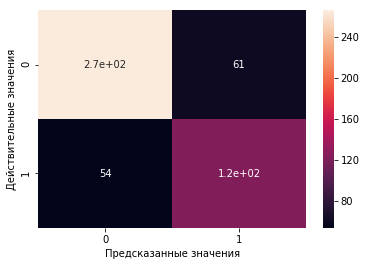

In [ ]:
%matplotlib inline
class_names = [0, 1]
fig, ax = plt.subplots()
ticks = np.arange(len(class_names))
plt.xticks(ticks, class_names)
plt.yticks(ticks, class_names)
sns.heatmap(pd.DataFrame(
metrics.confusion_matrix(y_test, y_pred)), annot=True)
plt.ylabel('Действительные значения')
plt.xlabel('Предсказанные значения')

In [ ]:
metrics.accuracy_score(y_test, y_pred)

0.7718253968253969

### Заключение
Лучшей моделью является классификатор на основе опорных векторов.    
Метричные показатели не велики, поскольку данные сильно зависят от человечкского фактора. Более точно предсказать нельзя.